# PyTorch  - CNNs

In [3]:
#Library for reading and writing a wide range 
# of image, video, scientific, and volumetric data formats.
# !pip install imageio

Shape of the image tensor: (1432, 1290, 4)


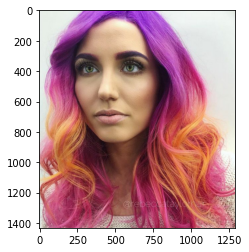

In [7]:
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

# Read image
im = imageio.imread("./awesome hair-4.png")
print("Shape of the image tensor: {}".format(im.shape))
plt.imshow(im);

Height x Width, 4 channels of RGB for this image

- slice out individual color channels

(1432, 1290)


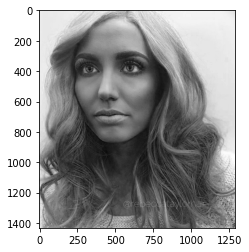

In [14]:
# Red channel im[:,:,0]
# im_1 = im[:,:,1]
# im_2 = im[:,:,2]
# im_3 = im[:,:,3] full black 

im_red = im[:,:,2]
print(im_red.shape)
plt.imshow(im_red, cmap='gray');

## Convolutions

In [15]:
import numpy as np
import torch
import torch.nn.functional as F

A fully connected CNN layer is a batch of vectors or a single

- $M$ = minibatch size
- Cin_ and Cout_ is the input and output units
- $W$ is the matrix weight
- $b$ is bias

y = ReLu($xW + b$)


In [16]:
# Create a random flat input vector
x_fc = torch.randn(100, 784)

# Create weight matrix variable
W = torch.randn(784, 10)/np.sqrt(784)
W.requires_grad_()

# Create bias variable
b = torch.zeros(10, requires_grad=True)

# Apply fully connected layer
y_preact = torch.matmul(x_fc, W) + b
y = F.relu(y_preact)

# Print input/output shape
print("Input shape: {}".format(x_fc.shape))
print("Output shape: {}".format(y.shape))

Input shape: torch.Size([100, 784])
Output shape: torch.Size([100, 10])


In [17]:
# Create a random image input tensor
x_cnn = torch.randn(100, 1, 28, 28)

# Create convolutional kernel variable
W1 = torch.randn(16, 1, 3, 3)/np.sqrt(1*3*3)
W1.requires_grad_()

# Create bias variable
b1 = torch.zeros(16, requires_grad=True)

# Apply convolutional layer
conv1_preact = F.conv2d(x_cnn, W1, bias=b1, stride=1, padding=1)
conv1 = F.relu(conv1_preact)

# Print input/output shape
print("Input shape: {}".format(x_cnn.shape))
print("Convolution output shape: {}".format(conv1.shape))

Input shape: torch.Size([100, 1, 28, 28])
Convolution output shape: torch.Size([100, 16, 28, 28])


In [18]:
# 2nd layer variables
W2 = torch.randn(32, 16, 3, 3)/np.sqrt(16*3*3)
W2.requires_grad_()
b2 = torch.zeros(32, requires_grad=True)

# Apply 2nd convolutional layer
conv2 = F.relu(F.conv2d(conv1, W2, bias=b2, stride=1, padding=1))

# Print output shape
print("Second convolution output shape: {}".format(conv2.shape))

Second convolution output shape: torch.Size([100, 32, 28, 28])


## Reshaping ``view()`` | ``np.reshape()``

the CNN expects a 4D input, with the dimensions corresponding to ``[batch, channel, height, width]``. Your data may not come in this format, so you may have to reshape it yourself.

In [28]:
M = torch.zeros(4, 3)
print(M)

M2 = M.view(1,1,12) # vector array <-->
print('\n M2 : ',M2)

M3 = M.view(2,1,2,3) # splits 2x1 2x1
print('\n M3:\n',M3)

M4 = M.view(-1,2,3) # same as M3
print('\n M4:\n',M4)

M5 = M.view(-1)
print('\n M5\n',M5)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

 M2 :  tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]])

 M3:
 tensor([[[[0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.]]]])

 M4:
 tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])

 M5
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


CNN architectures also commonly contain fully connected layers or a softmax, as we're often interested in classification. Both of these expect 2D inputs with dimensions ``[batch, dim]``, so you have to "flatten" a CNN's 4D output to 2D. 

In [29]:
# Reshape flat input image into a 4D batched image input
x_flat = torch.randn(100, 784)
x_reshaped = x_flat.view(-1, 1, 28, 28)

# Print input shape
print(x_reshaped.shape)

torch.Size([100, 1, 28, 28])


In [30]:
# Flatten convolutional feature maps into a vector
h_flat = conv2.view(-1, 28*28*32)

# Print output shape
print(h_flat.shape)

torch.Size([100, 25088])


## Pooling & Stride

- Dimensionality reduction: pooling and striding operations reduces computational complexity by shrinking the number of values passed to the next layer. For example, a 2x2 maxpool reduces the size of the feature maps by a factor of 4.
- Translational invariance: Oftentimes in computer vision, we'd prefer that shifting the input by a few pixels doesn't change the output. Pooling and striding reduces sensitivity to exact pixel locations.
- Increasing receptive field: by summarizing a window with a single value, subsequent convolutional kernels are seeing a wider swath of the original input image. For example, a max pool on some input followed by a 3x3 convolution results in a kernel "seeing" a 6x6 region instead of 3x3.

In [31]:
# Taking the output we've been working with so far, first print its current size
print("Shape of conv2 feature maps before pooling: {0}".format(conv2.shape))

# Max pool and then print new shape
max_pool2 = F.max_pool2d(conv2, kernel_size=2)
print("Shape of conv2 feature maps after max pooling: {0}".format(max_pool2.shape))

# Average pool and then print new shape
avg_pool2 = F.avg_pool2d(conv2, kernel_size=2)
print("Shape of conv2 feature maps after avg pooling: {0}".format(avg_pool2.shape))

Shape of conv2 feature maps before pooling: torch.Size([100, 32, 28, 28])
Shape of conv2 feature maps after max pooling: torch.Size([100, 32, 14, 14])
Shape of conv2 feature maps after avg pooling: torch.Size([100, 32, 14, 14])


In [32]:
# Recreate values in pooling figure and make it 4D
feature_map_fig = torch.tensor(np.array([[1,1,2,4],
                                        [5,6,7,8],
                                        [3,2,1,0],
                                        [1,2,3,4]], dtype=np.float32))
fmap_fig = feature_map_fig.view(1,1,4,4)
print("Feature map shape pre-pooling: {}".format(fmap_fig.shape))

# Maxpool
max_pool_fig = F.max_pool2d(fmap_fig, kernel_size=2)
print("\nMax pool")
print("Shape: {}".format(max_pool_fig.shape))
print(torch.squeeze(max_pool_fig))

# Avgpool
avg_pool_fig = F.avg_pool2d(fmap_fig, kernel_size=2)
print("\nAvg pool")
print("Shape: {}".format(avg_pool_fig.shape))
print(torch.squeeze(avg_pool_fig))

Feature map shape pre-pooling: torch.Size([1, 1, 4, 4])

Max pool
Shape: torch.Size([1, 1, 2, 2])
tensor([[6., 8.],
        [3., 4.]])

Avg pool
Shape: torch.Size([1, 1, 2, 2])
tensor([[3.2500, 5.2500],
        [2.0000, 2.0000]])


### Stride

In [33]:
# Since striding is part of the convolution operation, we'll start with the feature maps before the 2nd convolution
print("Shape of conv1 feature maps: {0}".format(conv1.shape))

# Apply 2nd convolutional layer, with striding of 2
conv2_strided = F.relu(F.conv2d(conv1, W2, bias=b2, stride=2, padding=1))

# Print output shape
print("Shape of conv2 feature maps with stride of 2: {0}".format(conv2_strided.shape))

Shape of conv1 feature maps: torch.Size([100, 16, 28, 28])
Shape of conv2 feature maps with stride of 2: torch.Size([100, 32, 14, 14])


## Build a CNN

CNN as our classifier: 
- $5 \times 5$ convolution 
- -> $2 \times 2$ max pool 
- -> $5 \times 5$ convolution 
- -> $2 \times 2$ max pool 
- -> fully connected to $\mathbb R^{256}$ 
- -> fully connected to $\mathbb R^{10}$ (prediction). 

In [34]:
import torch.nn as nn

class MNIST_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.fc1 = nn.Linear(7*7*64, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        # conv layer 1
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        
        # conv layer 2
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        
        # fc layer 1
        x = x.view(-1, 7*7*64)
        x = self.fc1(x)
        x = F.relu(x)
        
        # fc layer 2
        x = self.fc2(x)
        return x        

In [35]:
model = MNIST_CNN()
print(model)

MNIST_CNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=3136, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [36]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm, trange

# Load the data
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

## Training
# Instantiate model  
model = MNIST_CNN()  # <---- change here

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # <---- change here

# Iterate through train set minibatchs 
for epoch in trange(3):  # <---- change here
    for images, labels in tqdm(train_loader):
        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        x = images  # <---- change here 
        y = model(x)
        loss = criterion(y, labels)
        # Backward pass
        loss.backward()
        optimizer.step()

## Testing
correct = 0
total = len(mnist_test)

with torch.no_grad():
    # Iterate through test set minibatchs 
    for images, labels in tqdm(test_loader):
        # Forward pass
        x = images  # <---- change here 
        y = model(x)

        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())

print('Test accuracy: {}'.format(correct/total))

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw

Processing...


/Users/zane/Documents/venv/lib/python3.7/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy: 0.9900000095367432
